# Model Evaluation
In der heutigen Übung sollen Sie auf zwei verschiedene Dataset die Crossvalidation sowie Grid Search anwenden. Welcher Algorithmus (Decision Tree/ KNN) liefert für die Datasets jeweils die besseren Ergebnisse?

## Dataset 1 - Discription

This dataset contains 500 rows of sensor data collected from machinery used in manufacturing. The data includes sensor readings such as temperature, pressure, vibration, and operational hours, along with historical maintenance records for each machine. The goal of this dataset is to enable predictive maintenance analysis by providing information that can help identify patterns and potential failures before they occur. The dataset is designed to support machine learning models that predict when maintenance is needed based on sensor data, helping to optimize maintenance schedules and reduce downtime.

https://www.kaggle.com/datasets/ziya07/sensor-maintenance-dataset

## Dataset 1 laden
Das Dataset wird mit der nächsten Zelle aus der CSV Datei geladen. Da es sich um reale Daten handelt sind diese, anders als bisher, mit gemischten Datentypen (int/string/float/etc.) 
Die Daten werden auf Aufbereitet, damit Sie diese wie gewohnt verwenden können. Dabei werden einige Features weg gelassen.
Folgende Features werden aus dem Dataset verwendet:

'Voltage (V)','Current (A)','Temperature (°C)','Power (W)','Humidity (%)','Vibration (m/s²)'

Anmerkung: In der Praxis sollte man darauf verzichten Features zu streichen, für den Schulkontext vereinfacht dies die Übung jedoch.

In [28]:
import numpy as np
x_load=np.loadtxt(
    'sensor_maintenance_data.csv',
    dtype={'names':('Sensor_ID','Timestamp','Voltage (V)','Current (A)','Temperature (°C)','Power (W)','Humidity (%)','Vibration (m/s²)','Equipment_ID','Operational Status','Fault Status','Failure Type','Last Maintenance Date','Maintenance Type','Failure History','Repair Time (hrs)','Maintenance Costs (USD)','Ambient Temperature (°C)','Ambient Humidity (%)','External Factors','X','Y','Z','Equipment Relationship','Equipment Criticality','Fault Detected','Predictive Maintenance Trigger'),
     'formats':('S4','U19','f4','f4','f4','f4','f4','f4','S4','U15','U12','U20','U19','U15','S4','f4','f4','f4','U20','S10','f4','f4','U20','U15','U12','U5','f4')},
    delimiter=',',skiprows=1)
x=[]
vektor=[]
for row in x_load:
    spalten=[]
    for i in row:        
        spalten.append(i)
    vektor.append(spalten) 
x_matrix=np.array(vektor)
x=np.zeros([500,6])
x[:,0]=x_matrix[:,2].astype('float')
x[:,1]=x_matrix[:,3].astype('float')          
x[:,2]=x_matrix[:,4].astype('float')          
x[:,3]=x_matrix[:,5].astype('float')          
x[:,4]=x_matrix[:,6].astype('float')
x[:,5]=x_matrix[:,7].astype('float')
y=x_matrix[:,10].astype('str')
#print(np.unique(y))
x=x[:,0:-2]


## Aufgabe 1
Bestimmen Sie besten Algorithmus für diese Aufgabe (Tree oder KNN).
Nutzen Sie folgende Hyperparameterbereiche:
- Nachbarn: 4 bis 20
- Criterion: gini, entropy
- Maximale Tiefe: 2, 3, 4, 5, 6, 8, 10
- Minimale Zahl für die Teilung: 2, 4, 6
- Minimale Anzahl übriger Datenwerte: 1, 2
- Die Maximale Anzahl an Features die für den besten Split geprüft werden soll: sqrt, log2

Verwenden Sie die zudem die Methode GridSearch mit einer Crossvalidation mit dem Wert 10 zur Bestimmung der besten Hyperparameter. Trainieren Sie Abschließend mit diesen Werten nochmals einen Classifier und bestimmen Sie die Accuracy. Wie sieht die Confusion Matrix für dieses Dataset aus?

Die Rechenzeit beträgt ca. 5 Sekunden

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Use existing x, y from previous cells if present; otherwise fall back to synthetic data
try:
    X = x
    y_labels = y
except NameError:
    from sklearn.datasets import make_classification
    X, y_labels = make_classification(50000, n_features=30, n_classes=6, n_informative=24, n_clusters_per_class=1, n_redundant=3, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42)

# Sample Params for DecisionTreeClassifier
parameters = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2, 3, 4, 5, 6, 8, 10], 
    "min_samples_split": [2, 4, 6], 
    "min_samples_leaf": [1, 2], 
    "max_features": ["sqrt", "log2"]
}
clf_tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=3)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
print("Tree Accuarcy:", scores)
scores = cross_val_score(clf_tree, x_train, y_train, cv=10)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)

# GridSearchCV with proper parameter lists
parameters = {
    "n_neighbors": [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
    "weights": ["uniform", "distance"]
}
clf = KNeighborsClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=3)
grid_cv.fit(x_train, y_train)
print("Best KNN Params", grid_cv.best_params_)
clf.fit(x_test, y_test)
scores = clf.score(x_test, y_test)
print("KNN Accuarcy:", scores)
cross_scores = cross_val_score(clf, x_train, y_train, cv=10)
print("KNN Cross Scores",cross_scores)

Tree Accuarcy: 0.6733333333333333
Tree cross scores [0.68571429 0.68571429 0.65714286 0.65714286 0.65714286 0.65714286
 0.65714286 0.65714286 0.65714286 0.65714286]
Best Tree Params {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
Best KNN Params {'n_neighbors': 13, 'weights': 'uniform'}
KNN Accuarcy: 0.6066666666666667
KNN Cross Scores [0.62857143 0.62857143 0.74285714 0.57142857 0.54285714 0.6
 0.51428571 0.62857143 0.51428571 0.57142857]


## Dataset 2 - Discription

Machine Predictive Maintenance Classification Dataset

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.

    Target : Failure or Not
    Failure Type : Type of Failure

https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

## Dataset 2 laden

Das Dataset wird mit der nächsten Zelle aus der CSV Datei geladen. Da es sich um reale Daten handelt sind diese, anders als bisher, mit gemischten Datentypen (int/string/float/etc.) 
Die Daten werden auf Aufbereitet, damit Sie diese wie gewohnt verwenden können. Dabei werden einige Features weg gelassen.
Folgende Features werden aus dem Dataset verwendet:

'UDI','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'

Anmerkung: In der Praxis sollte man darauf verzichten Features zu streichen, für den Schulkontext vereinfacht dies die Übung jedoch.

In [49]:
import numpy as np
x_load=np.loadtxt(
    'predictive_maintenance.csv',
    dtype={'names':('UDI','Product ID','Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Target','Failure Type'),
     'formats':('i4','S10','S10','f4','f4','i4','f4','i4','i4','S10')},
    delimiter=',',skiprows=1)
x=[]
vektor=[]
for row in x_load:
    spalten=[]
    for i in row:        
        spalten.append(i)
    vektor.append(spalten) 
x_matrix=np.array(vektor)
x=np.zeros([10000,6])
x[:,0]=x_matrix[:,0].astype('int')
x[:,1]=x_matrix[:,3].astype('float')
x[:,2]=x_matrix[:,4].astype('float')
x[:,3]=x_matrix[:,5].astype('int')          
x[:,4]=x_matrix[:,6].astype('float')
x[:,5]=x_matrix[:,7].astype('int')
#x[:,6]=x_matrix[:,8].astype('int')
y=x_matrix[:,-1].astype('str')
#print(np.unique(y))
#x=x[:,0:-2]


## Aufgabe 2
Bestimmen Sie besten Algorithmus für diese Aufgabe (Tree oder KNN).
Nutzen Sie folgende Hyperparameterbereiche:
- Nachbarn: 10 bis 30
- weights: distance, uniform
- Criterion: gini, entropy
- Maximale Tiefe: 5, 6, 8, 9, 10, 11, 15, 20
- Minimale Zahl für die Teilung: 20, 40, 60
- Minimale Anzahl übriger Datenwerte: 10, 20
- Die Maximale Anzahl an Features die für den besten Split geprüft werden soll: sqrt, log2

Verwenden Sie die zudem die Methode GridSearch mit einer Crossvalidation mit dem Wert 10 zur Bestimmung der besten Hyperparameter. Trainieren Sie Abschließend mit diesen Werten nochmals einen Classifier und bestimmen Sie die Accuracy. Wie sieht die Confusion Matrix für dieses Dataset aus?

Die Rechenzeit beträgt ca. 54 Sekunden.

Tree Accuarcy: 1.0
Tree cross scores [0.97857143 0.97428571 0.98142857 0.98142857 0.97       0.97
 0.97714286 0.96714286 0.97285714 0.97285714]
Best Tree Params {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 40}
Best KNN Params {'n_neighbors': 17, 'weights': 'distance'}
KNN Accuarcy: 0.9716666666666667
KNN Cross Scores [0.96571429 0.97714286 0.97428571 0.97       0.97428571 0.96714286
 0.97142857 0.97       0.97428571 0.97      ]
Confusion Matrix:
 [[  23    0    0    0    0    0]
 [   0 2903    0    0    0    0]
 [   0    0   22    0    0    0]
 [   0    0    0   31    0    0]
 [   0    0    0    0    7    0]
 [   0    0    0    0    0   14]]


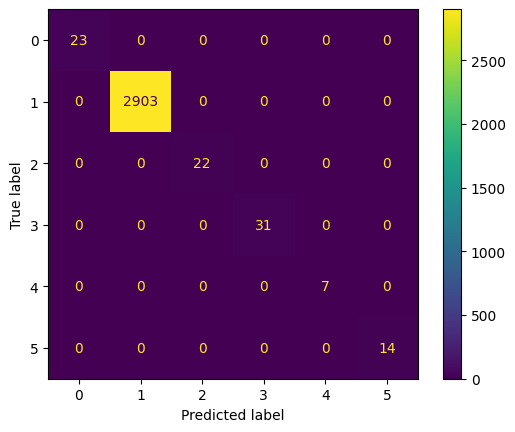

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Use existing x, y from previous cells if present; otherwise fall back to synthetic data
try:
    X = x
    y_labels = y
except NameError:
    from sklearn.datasets import make_classification
    X, y_labels = make_classification(50000, n_features=30, n_classes=6, n_informative=24, n_clusters_per_class=1, n_redundant=3, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42)

# Decision Tree with reasonable defaults
parameters = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 15, 20], 
    "min_samples_split": [20, 40, 60], 
    "min_samples_leaf": [10, 20], 
    "max_features": ["sqrt", "log2"]
}
clf_tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=3)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
print("Tree Accuarcy:", scores)
scores = cross_val_score(clf_tree, x_train, y_train, cv=10)
print("Tree cross scores",scores)
print("Best Tree Params", grid_cv.best_params_)

# GridSearchCV with proper parameter lists
parameters = {
    "n_neighbors": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
    "weights": ["uniform", "distance"]
}
clf = KNeighborsClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=3)
grid_cv.fit(x_train, y_train)
print("Best KNN Params", grid_cv.best_params_)
clf.fit(x_test, y_test)
scores = clf.score(x_test, y_test)
print("KNN Accuarcy:", scores)
cross_scores = cross_val_score(clf, x_train, y_train, cv=10)
print("KNN Cross Scores",cross_scores)


#Train again with best params and do confusion matrix
parameters = {"criterion": ["gini"], "max_depth": [7], "min_samples_split": [40], "min_samples_leaf": [10], "max_features": ["log2"]}
clf_tree = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf_tree, parameters, cv=3)
grid_cv.fit(x_train, y_train)
clf_tree.fit(x_test, y_test)
scores = clf_tree.score(x_test, y_test)
scores = cross_val_score(clf_tree, x_train, y_train, cv=10)
confusion_matrix = confusion_matrix(y_test, clf_tree.predict(x_test))
print("Confusion Matrix:\n", confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot()

## Aufgabe 3
Die zu bestimmenden Klassen besitzen in diesem Dataset Namen. Diese können mit der Methode np.unique(y) bestimmt werden. Sehen Sie sich die Namen an und werten Sie mit dieser Information erneut die Confusion Matrix aus!

## Aufgabe 4
Sie sollen nun die Vorhersage für einen neuen Datenpunkt erstellen. Sehen Sie sich die Werte hierzu für einen beliebigen Datenpunkt des zweiten Datasets an. 
Erzeugen Sie dann mit dem Aufruf np.array([Wert1, Wert2,...]).reshape(z.B.1,2) einen neuen Datenpunkt und führen Sie dann für diesen eine Vorhersage aus.

In [ ]:
import numpy as np
testPunkt6 = np.array([16774., 2.1765, 563.15, 500., 89840.0, 100.]).reshape(1,6)
testPunkt4 = np.array([5014., 298.15, 308.15, 1500.]).reshape(1,4)
print(clf_tree.predict(testPunkt6))
y_pred = clf_tree.predict(x_test)
print(f"y_pred:\n{y_pred}")

['Power Fail']
